In [0]:
from fastai.vision import *


In [0]:
folder='pizza'
file='pizza.csv'

path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

[PosixPath('data/pizza'),
 PosixPath('data/burger'),
 PosixPath('data/icecream'),
 PosixPath('data/cake'),
 PosixPath('data/cleaned.csv'),
 PosixPath('data/models')]

In [0]:
path=Path('data/pizza')
download_images(path/file, dest, max_pics=100)

In [0]:
folder='cake'
file='cake.csv'

path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

[PosixPath('data/pizza'),
 PosixPath('data/burger'),
 PosixPath('data/icecream'),
 PosixPath('data/cake'),
 PosixPath('data/cleaned.csv'),
 PosixPath('data/models')]

In [0]:
path=Path('data/cake')
file='cake.csv'
download_images(path/file, dest, max_pics=100)

In [0]:
folder='burger'
file='burger.csv'

path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

[PosixPath('data/pizza'),
 PosixPath('data/burger'),
 PosixPath('data/icecream'),
 PosixPath('data/cake'),
 PosixPath('data/cleaned.csv'),
 PosixPath('data/models')]

In [0]:
path=Path('data/burger')
file='burger.csv'
download_images(path/file, dest, max_pics=100)

In [0]:
folder='icecream'
file='icecream.csv'

path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

[PosixPath('data/pizza'),
 PosixPath('data/burger'),
 PosixPath('data/icecream'),
 PosixPath('data/cake'),
 PosixPath('data/cleaned.csv'),
 PosixPath('data/models')]

In [0]:
path=Path('data/icecream')
file='icecream.csv'
download_images(path/file, dest, max_pics=100)

In [0]:
classes=['icecream','cake','pizza','burger']
path=Path('data/')
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

icecream


cake


pizza


burger


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['burger', 'cake', 'icecream', 'pizza']

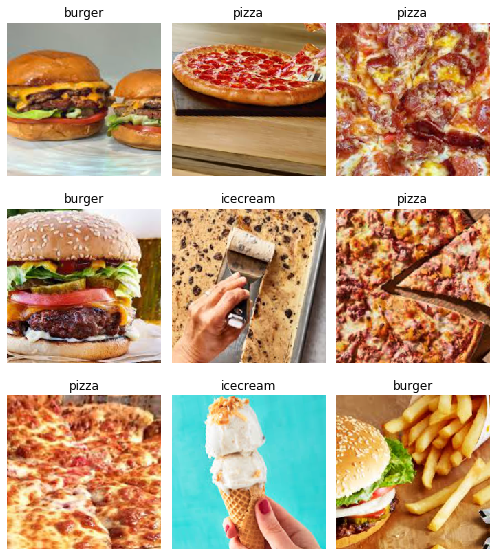

In [0]:
data.show_batch(rows=3, figsize=(7,8))


In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['burger', 'cake', 'icecream', 'pizza'], 4, 320, 80)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [0]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.959710,0.657801,0.237500,00:04
1,1.123408,0.123850,0.037500,00:04
2,0.756105,0.086848,0.037500,00:04
3,0.562707,0.091500,0.025000,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.133031,0.097805,0.037500,00:04
1,0.097262,0.096022,0.037500,00:04


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

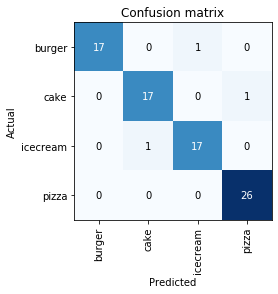

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
learn.export()


In [0]:
defaults.device = torch.device('cpu')


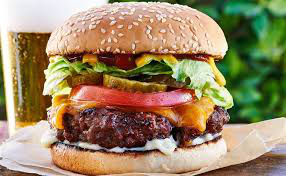

In [0]:
img = open_image(path/'burger'/'00000007.jpg')
img

In [0]:
learn = load_learner(path)


In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category burger